# Dataset Census
## Importanção da biblioteas necessarias
importação das bibliotecas

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

### Ler dataset

In [22]:
base = pd.read_csv('./dataset/census.csv')

Previa das 3 primeira linha da base de dados

In [23]:
base.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [24]:
base.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
base.shape

(32561, 15)

## Relação entre o salario e a quntidade de trabalhadores

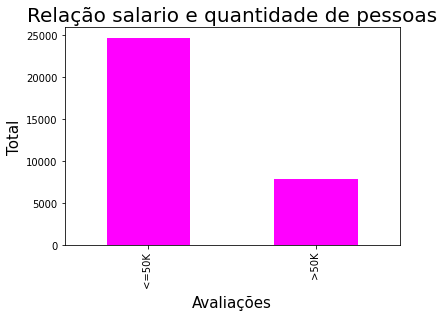

In [26]:
base['income'].value_counts().plot.bar(color = 'magenta')
plt.title('Relação salario e quantidade de pessoas', fontsize=20)
plt.xlabel('Avaliações', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

Como vemos a maior parte das pessoas do dataset recebe <=50k

## Relação entre o sexo e a quantidade de trabalhadores.

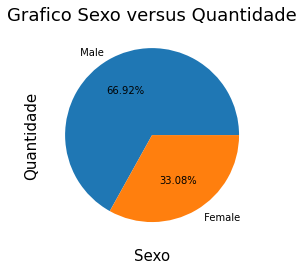

In [27]:
base.sex.value_counts().plot(kind='pie', autopct = '%.2f%%')
plt.title('Grafico Sexo versus Quantidade',fontsize=18)
plt.xlabel('Sexo',fontsize=15)
plt.ylabel('Quantidade',fontsize=15)
plt.show()

A maior parte dos trabalhadores é do sexo masculino

## Verificação do sexo que ganha salario mais alto
Primeiro vamos contar a quantidade de homens e de mulheres. Vamos armazenar a quantidade de homens
na variavel men, e a quantidade de mulheres na variavel women.
Precisamos tambem da quantida de homens que ganham mais que >50K  tambem da quantidade de mulher
vamos armezebar em men_maior50 e women_maoir50, respectivamente

In [28]:
men = base[(base.sex==' Male')].count()[0]
women = base[(base.sex==' Female')].count()[0]
men_maior50 = base[(base.sex==' Male') & (base.income==' >50K')].count()[0]
women_maior50 = base[(base.sex==' Female') & (base.income==' >50K')].count()[0]

In [29]:
base[base['income']==' >50K'].count()[0]

7841

In [30]:
base[base['income']==' <=50K'].count()[0]

24720

### Pouco mais de 10% das mulheres recebem >50K

In [31]:
[women_maior50/women]

[0.10946058861758426]

### Quanto aos homens mais de 30% dos homens recebem salarios maiors que >50K

In [32]:
[men_maior50/men]

[0.3057365764111978]

In [33]:
m1 = np.array([men - men_maior50,men_maior50])/men
m2 = np.array([women - women_maior50,women_maior50])/women
p = pd.DataFrame([m1,m2],index=['Homem','Mulher'],columns=['Ganhado <=50K ','Ganhando >50k'])

In [34]:
p

,Ganhado <=50K,Ganhando >50k
Homem,0.694263,0.305737
Mulher,0.890539,0.109461


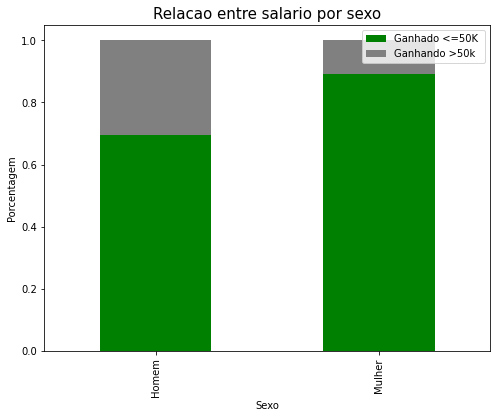

In [35]:
p.plot(kind = 'bar',
        stacked = True,
        figsize=(8,6),
        color = ['green','gray']
)
plt.title('Relacao entre salario por sexo',fontsize=15)
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')        
plt.show()

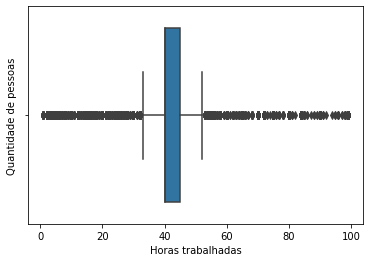

In [36]:
sns.boxplot(x=base["hour-per-week"])
plt.xlabel('Horas trabalhadas')
plt.ylabel('Quantidade de pessoas')        
plt.show()